In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import matplotlib.pyplot as plt
import scipy.stats as stats


##  Evaluate different model fusion

Fusion4: ['Demand','HCP','MDTB'],

Fusion5: ['Demand','HCP','IBC','MDTB','Somatotopic','WMFS','Nishimoto'],

Fusion6: ['Demand'','IBC','MDTB','Somatotopic','WMFS','Nishimoto'],

Fusion7: ['Demand','IBC','MDTB','WMFS','Nishimoto'],

In [2]:
# These are the non-cross-validated model evaluations results:
dff = rm.comb_eval(models=['Fu'],eval_t='eval')

# For the paper, we only use the cross-validated results:
dff=rm.comb_eval(models=['Fu04-loo','Fu05-loo','Fu06-loo','Fu07-loo'],eval_t='eval')


<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval'>

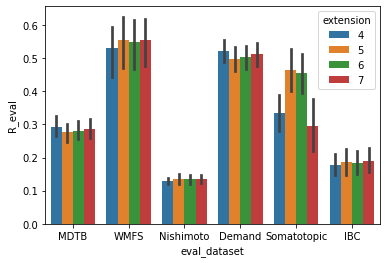

In [3]:
# Cross-validated:
sns.barplot(data=dff,x='eval_dataset',hue='extension',y='R_eval')

In [4]:
# Compare the version with (5) and without HCP (6) in the fusion model 
def comp_fusion(dff):
    sns.barplot(data=dff,x='extension',y='R_eval')
    t=stats.ttest_rel(dff[dff['extension']==5]['R_eval'],dff[dff['extension']==6]['R_eval']) 
    indx =dff['extension']==5
    df=indx.sum()-1
    print(f't({df}) = {t.statistic:.2f}, p={t.pvalue:.4f}')

t(102) = -1.51, p=0.1349
with HCP: 0.394, without HCP: 0.396


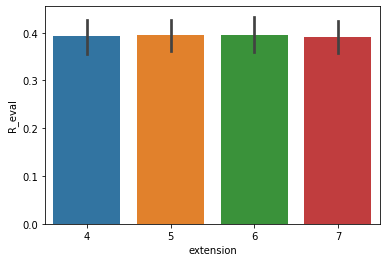

In [6]:
comp_fusion(dff)
m1 = dff[dff['extension']==5]['R_eval'].mean()
m2 = dff[dff['extension']==6]['R_eval'].mean()

print(f'with HCP: {m1:.3f}, without HCP: {m2:.3f}')